Importing important libraris 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
%matplotlib inline 
! pip install --upgrade category_encoders 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model   
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Loading dataset**

In [ ]:
import pandas as pd
data = pd.read_csv(r'1000_Companies.csv')
print(data)

     R&D Spend  Administration  Marketing Spend       State        Profit
0    165349.20      136897.800      471784.1000    New York  192261.83000
1    162597.70      151377.590      443898.5300  California  191792.06000
2    153441.51      101145.550      407934.5400     Florida  191050.39000
3    144372.41      118671.850      383199.6200    New York  182901.99000
4    142107.34       91391.770      366168.4200     Florida  166187.94000
..         ...             ...              ...         ...           ...
995   54135.00      118451.999      173232.6695  California   95279.96251
996  134970.00      130390.080      329204.0228  California  164336.60550
997  100275.47      241926.310      227142.8200  California  413956.48000
998  128456.23      321652.140      281692.3200  California  333962.19000
999  161181.72      270939.860      295442.1700    New York  476485.43000

[1000 rows x 5 columns]


In [ ]:
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
print(data.shape)

(1000, 5)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
data.value_counts()

R&D Spend  Administration  Marketing Spend  State       Profit      
84533.0    122941.3141     231885.6935      California  121248.71160    2
0.0        116983.8000     45173.0600       California  14681.40000     1
108131.0   126426.3742     277418.0990      Florida     141408.27940    1
108270.0   126446.9024     277686.2998      Florida     141527.02590    1
108606.0   126496.5244     278334.6128      Florida     141814.06780    1
                                                                       ..
55907.0    118713.6960     176651.7484      California  96793.76682     1
56428.0    118790.6397     177657.0193      New York    97238.85262     1
56547.0    118808.2141     177886.6301      Florida     97340.51329     1
56584.0    118813.6785     177958.0217      California  97372.12207     1
165349.2   136897.8000     471784.1000      New York    192261.83000    1
Length: 999, dtype: int64

In [ ]:
#check if we have null val in data
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [ ]:
data.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,California,NaN
freq,NaN,NaN,NaN,344,NaN
mean,81668.927200,122963.897612,226205.058419,NaN,119546.164656
std,46537.567891,12613.927535,91578.393542,NaN,42888.633848
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,43084.500000,116640.684850,150969.584600,NaN,85943.198543
50%,79936.000000,122421.612150,224517.887350,NaN,117641.466300
75%,124565.500000,129139.118000,308189.808525,NaN,155577.107425


In [ ]:
#extracting independent and dependent variables
#x = data.iloc[:,:-1].values
#y = data.iloc[:,4].values
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# **visualizing the data before processing**

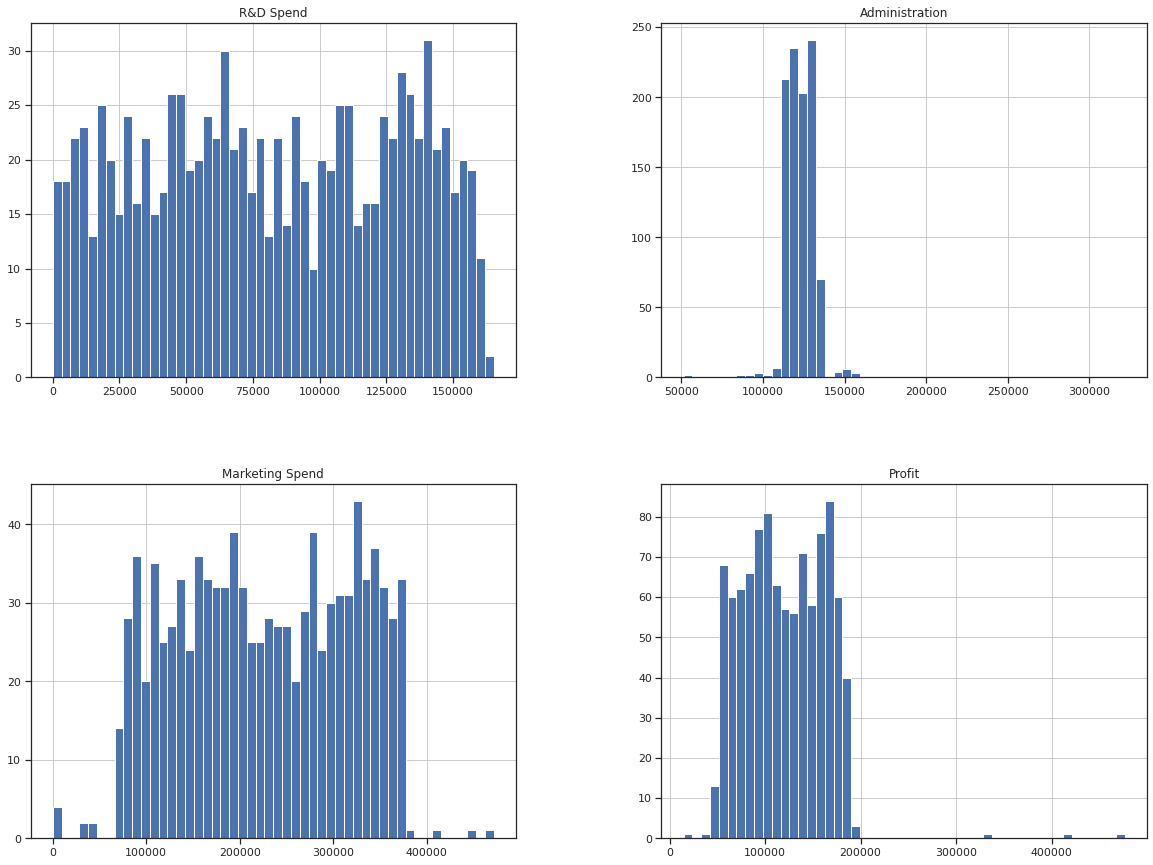

In [ ]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


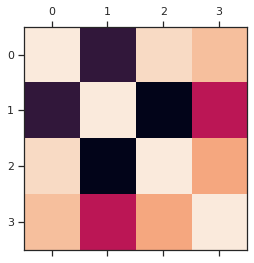

In [ ]:
plt.matshow(data.corr())
plt.show()

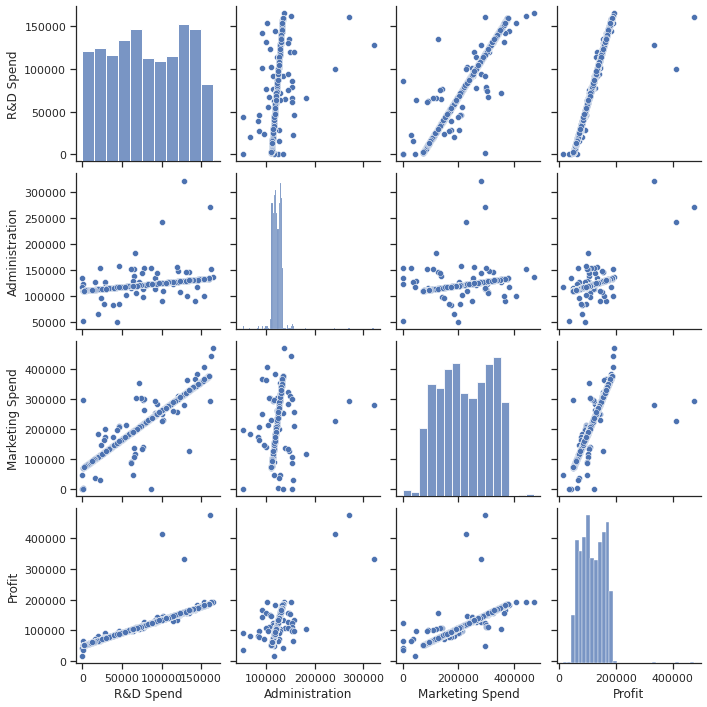

In [ ]:
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(data)
plt.savefig('corl.png')
plt.show()


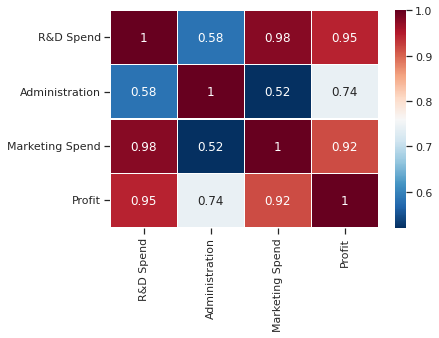

In [ ]:
sns.heatmap(data.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.25)
plt.savefig('Heatmap.png')
plt.show()

In [ ]:
# Correlation Matrix after we saw the Heatmap according to the profit
data_corr = data.corr()
data_corr['Profit'].sort_values(ascending=False)

Profit             1.000000
R&D Spend          0.945245
Marketing Spend    0.917270
Administration     0.741560
Name: Profit, dtype: float64

# **Encoding categorical data**

In [ ]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(['State'])
data_encoded = encoder.fit_transform(data)
data_encoded.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


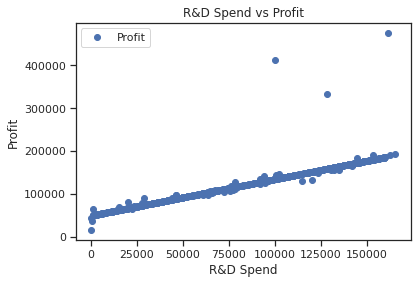

In [ ]:
# Check if there any relationship between the data
data.plot(x='R&D Spend', y='Profit', style='o')  
plt.title('R&D Spend vs Profit')  
plt.xlabel('R&D Spend')  
plt.ylabel('Profit')  
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


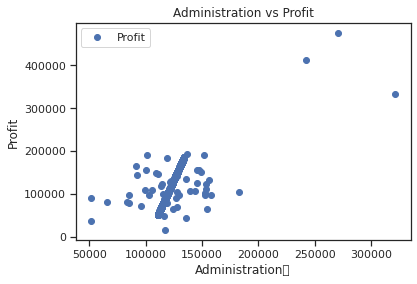

In [ ]:
# Check if there any relationship between the data
data.plot(x='Administration', y='Profit', style='o')  
plt.title('Administration vs Profit')  
plt.xlabel('Administration	')  
plt.ylabel('Profit')  
plt.show()

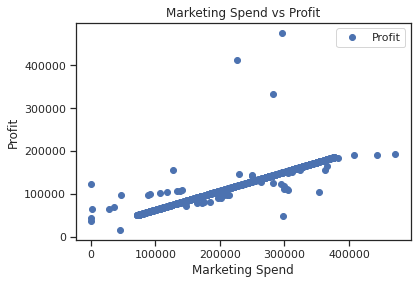

In [ ]:
# Check if there any relationship between the data
data.plot(x='Marketing Spend', y='Profit', style='o')  
plt.title('Marketing Spend vs Profit')  
plt.xlabel('Marketing Spend')  
plt.ylabel('Profit')  
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


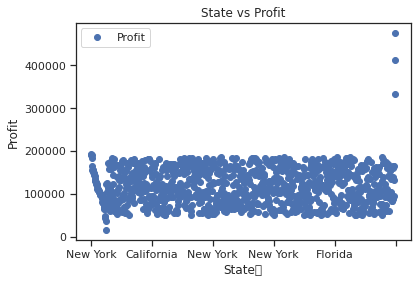

In [ ]:
# Check if there any relationship between the data
data.plot(x='State', y='Profit', style='o')  
plt.title('State vs Profit')  
plt.xlabel('State	')  
plt.ylabel('Profit')  
plt.show()

In [ ]:
x = data_encoded['R&D Spend'].values.reshape(-1,1)
y = data_encoded['Profit'].values.reshape(-1,1)

#x2 = data_encoded[['Marketing Spend','Administration','State']].values 
x2 = data_encoded[['Marketing Spend','Administration']].values.reshape(-1,2)
y2 = data_encoded['Profit'].values.reshape(-1,1)

print('Simple')
print(x.shape)
print(y.shape)

print('\nMulti')
print(x2.shape)
print(y2.shape)


#splitting dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state = 42)

Simple
(1000, 1)
(1000, 1)

Multi
(1000, 2)
(1000, 1)


In [ ]:
#simple
print(x_train.shape)
print(y_train.shape)

#multi
print(x2_train.shape)
print(y2_train.shape)

(800, 1)
(800, 1)
(800, 2)
(800, 1)


In [ ]:
#simple
print(y_test.shape)

#multi
print(y2_test.shape)

(200, 1)
(200, 1)


# **Simple**

#Fitting the Multiple Linear Regression Model to Training Set

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# **Multi**

In [ ]:
regressor = LinearRegression()  
regressor.fit(x2_train, y2_train)

LinearRegression()

# **finding coefficients and intercepts**

# **Simple**

In [ ]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)


[48430.00326384]
[[0.87017988]]


# **Multi**

In [ ]:
#In multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes.
print(regressor.coef_)

[[0.32890263 1.39361653]]


# **predicting the test, train dataset**

# **Simple**

In [ ]:
from sklearn import metrics 
y_pred = model.predict(x_test)


In [ ]:
from sklearn import metrics 
y_pred_train = model.predict(x_train)


# **Multi**

In [ ]:
y2_pred = regressor.predict(x2_test)

In [ ]:
from sklearn import metrics 
y_pred_train2 = regressor.predict(x2_train)

# **Simple**

In [ ]:
#Compare the actual output values for x_test with the predicted values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data

,Actual,Predicted
0,124269.48590,125065.874756
1,111257.77400,111812.165066
2,91370.72519,91555.247735
3,126846.88300,127691.207442
4,161008.28630,162487.960320
...,...,...
195,63306.39937,62968.968631
196,135591.40940,136598.368652
197,117700.83950,118375.061690
198,138213.22960,139268.950691


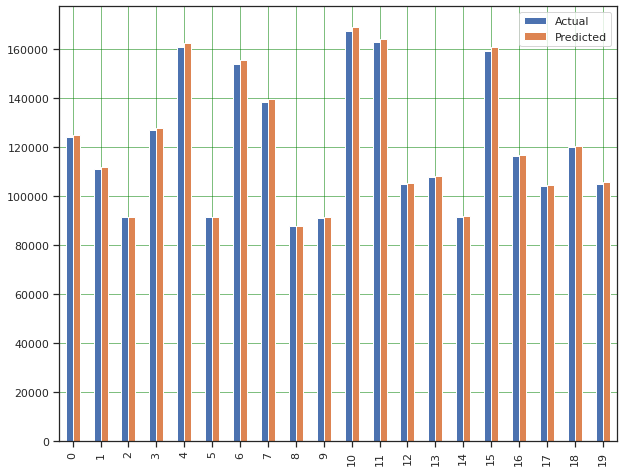

In [ ]:
#visualize comparison result as a bar graph
#number of records is huge, representation purpose(20 records)
data1 = data.head(20)
data1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# **Multi**

In [ ]:
#difference between the actual value and predicted value.
data = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_pred.flatten()})
data

,Actual,Predicted
0,124269.48590,124426.313702
1,111257.77400,111625.661004
2,91370.72519,92061.194346
3,126846.88300,126961.903536
4,161008.28630,160569.184602
...,...,...
195,63306.39937,64452.091761
196,135591.40940,135564.587569
197,117700.83950,117964.215394
198,138213.22960,138143.880002


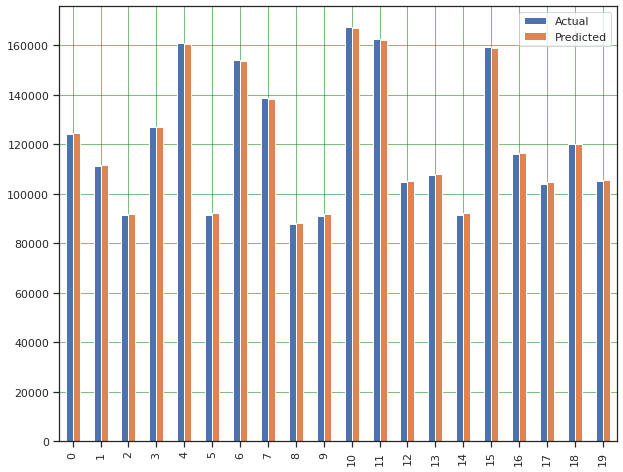

In [ ]:
#visualize comparison result as a bar graph
#number of records is huge, representation purpose(20 records)
data2 = data.head(20)
data2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# **Evaluate the performance of the algorithm**

This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

# **Simple**

In [ ]:
print('Mean Absolute Error Train: ', metrics.mean_absolute_error(y_train,  y_pred_train))  
print('Mean Squared Error Train: ', metrics.mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error Train: ', np.sqrt(metrics.mean_squared_error(y_train,  y_pred_train)))

print('\nMean Absolute Error Test:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error Test:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error Test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#162

Mean Absolute Error Train:  1908.4057760608976
Mean Squared Error Train:  206552101.85690853
Root Mean Squared Error Train:  14371.92060432107

Mean Absolute Error Test: 1746.5833817015828
Mean Squared Error Test: 152437434.16445342
Root Mean Squared Error Test: 12346.555558715694


In [ ]:
data.describe()

,Actual,Predicted
count,200.000000,200.000000
mean,118677.815496,119035.169414
std,42074.068616,44094.649387
min,50070.863160,47056.618928
25%,86059.168595,86835.794886
50%,113727.103200,114054.935997
75%,156428.003125,156063.196823
max,333962.190000,414762.760518


In [ ]:
print(model.coef_)

[[0.87017988]]


In [ ]:
#calculating the intercept 
print(model.intercept_)

[48430.00326384]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9134554891584079

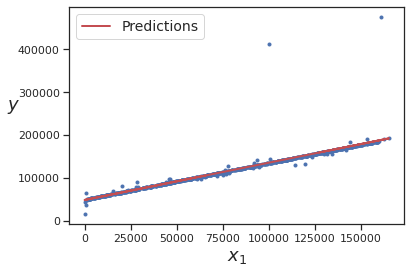

In [ ]:
plt.plot(x_train, y_train, "b.")
plt.plot(x_train, y_pred_train, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()


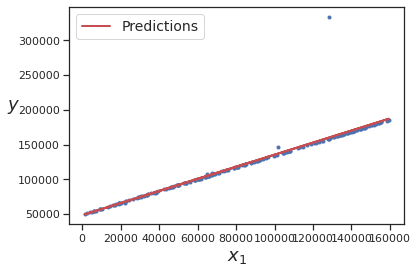

In [ ]:
plt.plot(x_test, y_test, "b.")
plt.plot(x_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

# **Multiple linear reg**

In [ ]:
x2_train.shape

(800, 2)

In [ ]:
print('Mean Absolute Error Train:', metrics.mean_absolute_error(y2_train,  y_pred_train2))  
print('Mean Squared Error Train:', metrics.mean_squared_error(y2_train, y_pred_train2))  
print('Root Mean Squared Error Train:', np.sqrt(metrics.mean_squared_error(y2_train,  y_pred_train2)))

print('\nMean Absolute Error Test:', metrics.mean_absolute_error(y2_test, y2_pred))  
print('Mean Squared Error Tset:', metrics.mean_squared_error(y2_test, y2_pred))  
print('Root Mean Squared Error Test:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

# importing r2_score module
score=r2_score(y2_test,y2_pred)
print('\nr2 socre is ',score)

#944

Mean Absolute Error Train: 2745.7670078329347
Mean Squared Error Train: 133115948.83525898
Root Mean Squared Error Train: 11537.588519064933

Mean Absolute Error Test: 1801.6425032015854
Mean Squared Error Tset: 60812508.72292086
Root Mean Squared Error Test: 7798.237539529099

r2 socre is  0.9654744331710714


In [ ]:
from sklearn.metrics import r2_score
r2_score(y2_test, y2_pred)

0.9654744331710714

# **Other Models**

# **Ridge**

In [ ]:
ridge_reg=Ridge(alpha=0.1, solver="cholesky", random_state=42)
ridge_reg.fit(x2_train,y2_train)
regr=linear_model.LinearRegression() 
ridge_reg.fit(x2_test, y2_test)
predict_y = ridge_reg.predict(x2_test)


print('Mean Absolute Error Train:', metrics.mean_absolute_error(y2_train,  y_pred_train2))  
print('Mean Squared Error Train:', metrics.mean_squared_error(y2_train, y_pred_train2))  
print('Root Mean Squared Error Train:', np.sqrt(metrics.mean_squared_error(y2_train,  y_pred_train2)))

print('\nMean Absolute Error Test:', metrics.mean_absolute_error(y2_test, predict_y))  
print('Mean Squared Error Test:', metrics.mean_squared_error(y2_test, predict_y))  
print('Root Mean Squared Error Test:', np.sqrt(metrics.mean_squared_error(y2_test, predict_y)))


from sklearn.metrics import r2_score
print('R2 Score: ',r2_score(y2_test, predict_y),'\n')

ridge_reg.intercept_,ridge_reg.coef_

Mean Absolute Error Train: 2745.7670078329347
Mean Squared Error Train: 133115948.83525898
Root Mean Squared Error Train: 11537.588519064933

Mean Absolute Error Test: 1048.4702519190093
Mean Squared Error Test: 19291126.966896232
Root Mean Squared Error Test: 4392.166545896937
R2 Score:  0.9890476958229831 



(array([-80570.53022055]), array([[0.36636441, 0.95317264]]))

We can use this model to solve multiple linear regressions because the accuracy score is greater than 0.9, and the mean squared error rate is lower.

# **XGBRegressor **

In [ ]:
from xgboost import XGBRegressor 

model_xgb = XGBRegressor(random_state=23)
model_xgb.fit(x2_train, y2_train)
#training score
score = model_xgb.score(x2_train,y2_train)
print('Train Score : ', score)

#predict on test data
pred_test_xgb = model_xgb.predict(x2_test)
print(pred_test_xgb)

#predict on train data
pred_train_xgb  = model_xgb.predict(x2_train)


r2_test_xgb = r2_score(y2_test, pred_test_xgb).round(4)
mse_test_xgb = mean_squared_error(y2_test, pred_test_xgb).round(4)
rmse_test_xgb = np.sqrt(mean_squared_error(y2_test, pred_test_xgb)).round(4)
mae_test_xgb = metrics.mean_absolute_error(y2_test, pred_test_xgb).round(4)


r2_train_xgb = r2_score(y2_train, pred_train_xgb).round(4)
mse_train_xgb = mean_squared_error(y2_train, pred_train_xgb).round(4)
rmse_train_xgb = np.sqrt(mean_squared_error(y2_train, pred_train_xgb)).round(4)
mae_train_xgb = metrics.mean_absolute_error(y2_train, pred_train_xgb).round(4)

print('\nMean Absolute Error Train:', mae_train_xgb) 
print('Mean Squared Error Train:',mse_train_xgb)
print('Root Mean Squared Error Train:', rmse_train_xgb)



print('\nMean Absolute Error Test:', mae_test_xgb) 
print('Mean Squared Error Test:',mse_test_xgb)
print('Root Mean Squared Error Test:', rmse_test_xgb)


from sklearn.metrics import r2_score
print('R2 Score: ',r2_score(y2_test, pred_test_xgb),'\n')


[05:57:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Score :  0.9934674919182419
[124618.22  109176.51   90665.96  126479.78  160666.5    91222.59
 155117.53  138491.06   88699.1    90665.96  167226.7   164199.78
 104982.91  107279.1    91963.766 160401.22  113703.16  104282.99
 124119.69  104982.91   77497.74  125676.21   64913.45   69940.586
 169531.44  164199.78  177662.36  134872.55  124119.69  160666.5
 143628.66  111812.914 165570.8   141020.45   64913.45   88699.1
  83589.04   72444.89  113703.16  169531.44   60391.56   89381.4
 124119.69  141432.86  168940.34  145146.28  150183.95  138166.58
 141432.86   72444.89  113703.16   61643.996 170938.14  176722.52
 146330.66   60901.023 179117.48  120669.44  124119.69   67870.055
 118081.75   90011.125 181434.83   61643.996 178822.17   99358.21
  64913.45   51995.613  83589.04   99358.21  102232.19  134872.55
 126479.78  166856.94   93735.15  104982.91  101

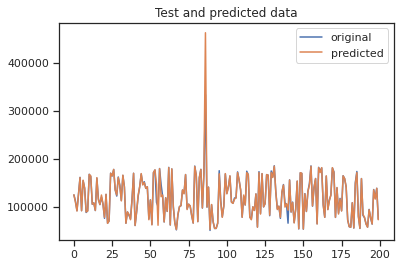

In [ ]:
x_ax = range(len(y2_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, pred_test_xgb, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

# **Use CV for XGBRegressor**

In [ ]:
#to improve accuracy use cv validation
from sklearn.model_selection import cross_val_score


In [ ]:
XGBmodel = XGBRegressor(objective = "reg:squarederror")

In [ ]:
scores = cross_val_score(XGBmodel,x2,y2,scoring="neg_mean_squared_error", cv=10)#opt

In [ ]:
scores

array([-1.39671844e+09, -1.58648336e+06, -1.61430013e+06, -1.54909192e+06,
       -1.17017541e+06, -1.41946756e+06, -1.55796447e+06, -2.57315924e+06,
       -1.67388759e+06, -2.44635868e+09])

In [ ]:
rmse = np.sqrt(- scores)
print(rmse)
#after cv the rmse down from 10632 - 1292.78 it help to improve accuracy , do better prediction and get higer accuracy

[37372.69646968  1259.55681048  1270.55111307  1244.62521464
  1081.74646416  1191.41410157  1248.18447145  1604.10699112
  1293.78807869 49460.67808067]
